In [1]:
import plotly.plotly as py
from plotly.graph_objs import *
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
from scipy.stats import norm
import plotly.figure_factory as ff
import math
from scipy.stats import skewnorm
import datetime as dt

In [16]:
x = np.random.normal(0,1,86400)
y = np.random.normal(0,1,86400)
z = np.random.normal(0,1,86400) + 9.81

t = [dt.datetime.today().replace(microsecond=0) - dt.timedelta(seconds=i) for i in range(86400)]

In [18]:
df = pd.DataFrame.from_dict({'Time': t[::-1],
                             'X': x,
                             'Y': y,
                             'Z': z
                            })

now = dt.datetime.now()
sec = now.second
minute = now.minute
hour = now.hour

totalTime = (hour * 3600) + (minute * 60) + (sec)
df

,Time,X,Y,Z
0,2019-02-17 07:11:56,1.739585,0.083215,7.877314
1,2019-02-17 07:11:57,0.025910,-0.763128,10.833781
2,2019-02-17 07:11:58,0.125340,-0.447049,9.257324
3,2019-02-17 07:11:59,-1.191629,0.815309,10.499259
4,2019-02-17 07:12:00,-0.811312,0.309939,9.208581
5,2019-02-17 07:12:01,-0.729301,-0.886224,11.909890
6,2019-02-17 07:12:02,0.639155,-1.746519,10.214308
7,2019-02-17 07:12:03,-1.360597,-1.021212,10.178917
8,2019-02-17 07:12:04,-2.228701,-0.669443,9.735324
9,2019-02-17 07:12:05,-0.107771,-0.498351,9.777914


In [20]:
import sqlite3
from datetime import *
connex = sqlite3.connect("acceleration-data.db")  # Opens file if exists, else creates file
cursor = connex.cursor()

cursor.execute("DROP TABLE IF EXISTS acceleration")
df.to_sql(name='acceleration', con=connex)


In [21]:
con = sqlite3.connect("acceleration-data.db")
df = pd.read_sql_query("SELECT * from acceleration where rowid > "+ str(totalTime-200) + " AND rowid < " + str(totalTime) + ";" , con)
df


,index,Time,X,Y,Z
0,25770,2019-02-17 14:21:26,0.596065,0.830193,13.221947
1,25771,2019-02-17 14:21:27,-0.293983,-1.087198,8.544500
2,25772,2019-02-17 14:21:28,-0.725090,-1.215463,10.354662
3,25773,2019-02-17 14:21:29,-1.769063,0.738231,9.510353
4,25774,2019-02-17 14:21:30,1.444204,-1.650826,9.501762
5,25775,2019-02-17 14:21:31,-0.026365,0.066670,10.287846
6,25776,2019-02-17 14:21:32,1.125016,2.070965,10.717419
7,25777,2019-02-17 14:21:33,-0.529944,-0.551272,10.169523
8,25778,2019-02-17 14:21:34,-0.214502,-0.461126,9.122346
9,25779,2019-02-17 14:21:35,-0.427939,-0.447304,8.936307


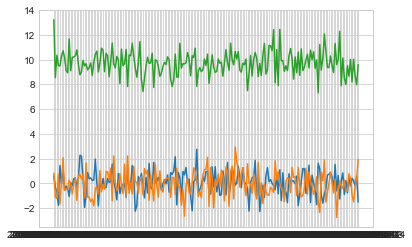

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()


ax.plot(df["Time"], df["X"])
ax.plot(df["Time"], df["Y"])
ax.plot(df["Time"], df["Z"])